# 탐색적 분석 - titanic

**Table of contents**<a id='toc0_'></a>    
- [탐색적 분석](#toc1_)    
  - [데이터 다운로드](#toc1_1_)    
  - [데이터 기본 정보](#toc1_2_)    
  - [연속형 변수 탐색](#toc1_3_)    
    - [연속형 변수 시각화](#toc1_3_1_)    
    - [산포도](#toc1_3_2_)    
    - [도수 분포표와 상대도수 분포표 (구간화)](#toc1_3_3_)    
    - [계산적 대표값](#toc1_3_4_)    
    - [위치적 대표값](#toc1_3_5_)    
    - [절대적 산포도](#toc1_3_6_)    
    - [왜도와 첨도](#toc1_3_7_)    
    - [상관계수](#toc1_3_8_)    
  - [범주형 변수 탐색](#toc1_4_)    
    - [도수 분포표 및 상대도수 분포표](#toc1_4_1_)    
    - [상관계수 분석](#toc1_4_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[탐색적 분석](#toc0_)

- 타이타닉 생존자 예측 문제 데이터의 전처리

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.36.15.png?raw=1" width=400 align='left'>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## <a id='toc1_1_'></a>[데이터 다운로드](#toc0_)
- 타이타닉 탑승자 개인별 데이터를 보고 생존 여부를 예측하는 예제 데이터

- Survival - 생존여부(타겟변수 y): 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

In [30]:
data = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/titanic_train.csv")
print(data.shape)
data[:3]

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [31]:
# 사본 사용
df = data.copy()

## <a id='toc1_2_'></a>[데이터 기본 정보](#toc0_)
- info를 사용
- 컬럼 이름, 컬럼수(특성 수), 샘플수를 파악한다
- 카테고리형 타입(object)과 숫자형 타입(int, float)을 파악한다
 - 숫자 타입도 연속적인 값을 갖는 아나로그형과 카테고리형이 있다

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
cat_col_names = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
con_col_names = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [34]:
# 숫자형 데이터의 기본 통계값 보기
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
# 데이터 분석을 위해 임시로 결측치 제거한다.
df = df.dropna()

## <a id='toc1_3_'></a>[연속형 변수 탐색](#toc0_)

### <a id='toc1_3_1_'></a>[연속형 변수 시각화](#toc0_)

<AxesSubplot: >

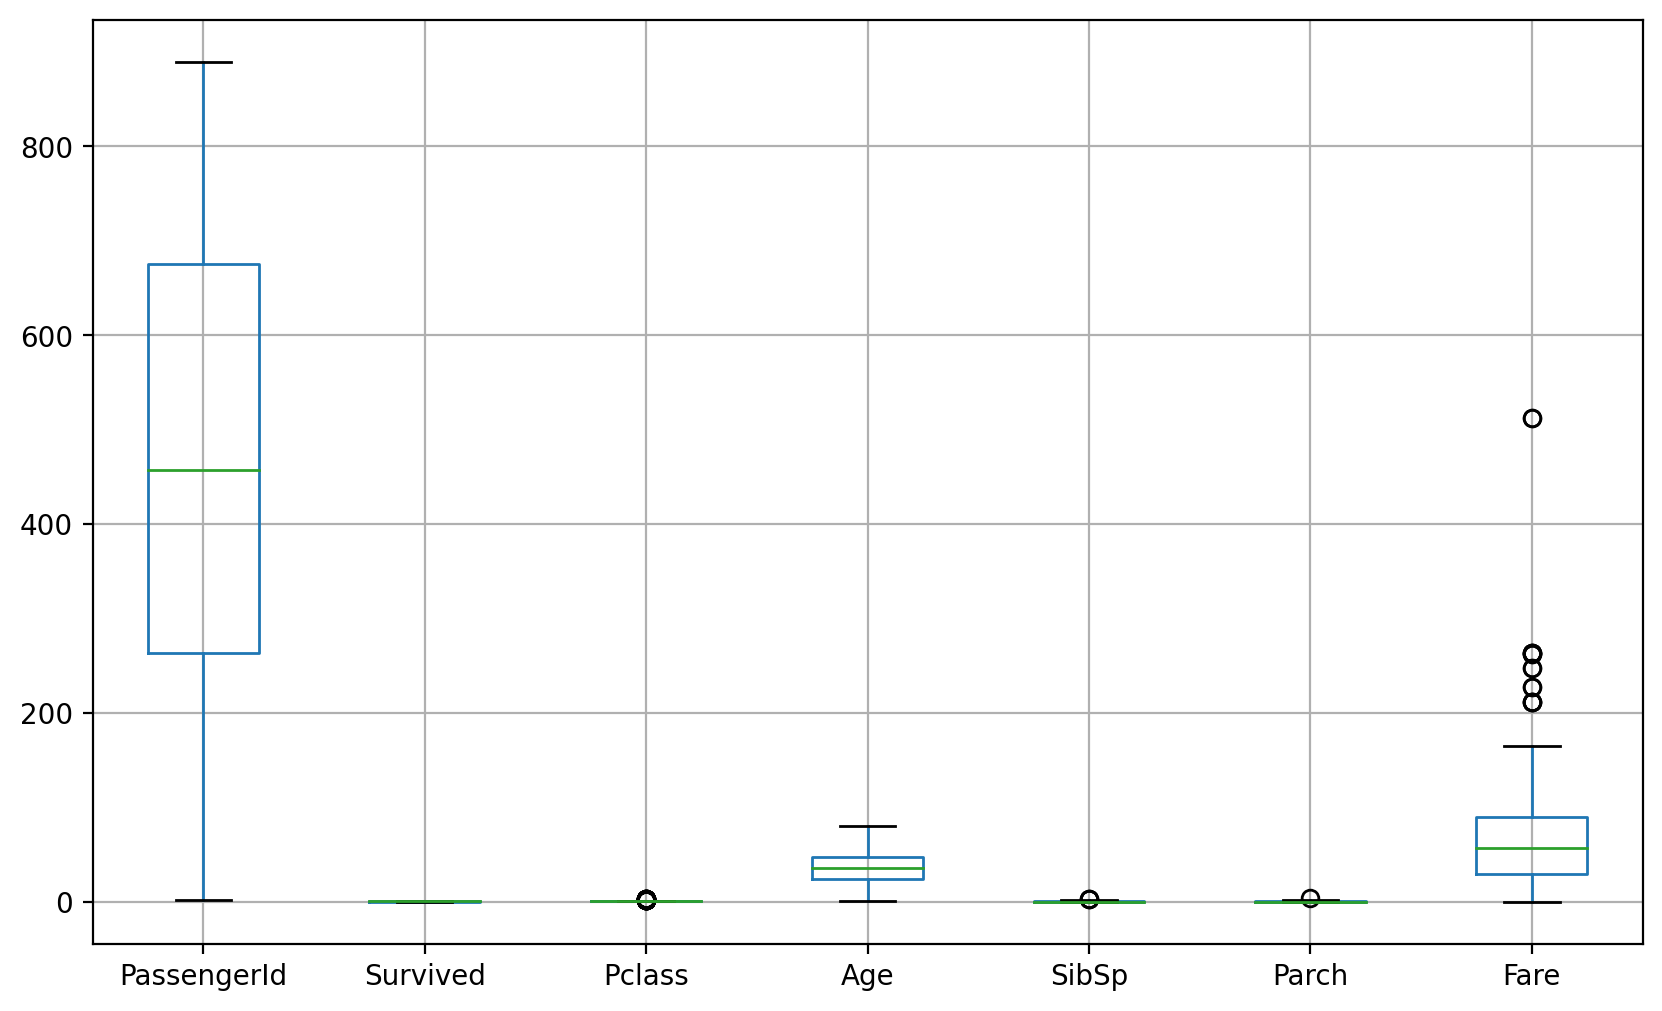

In [36]:
# 박스 플롯으로 데이터의 전체적인 값의 범위를 파악할 수 있다
plt.figure(figsize=(10,6))
df.boxplot()

<AxesSubplot: >

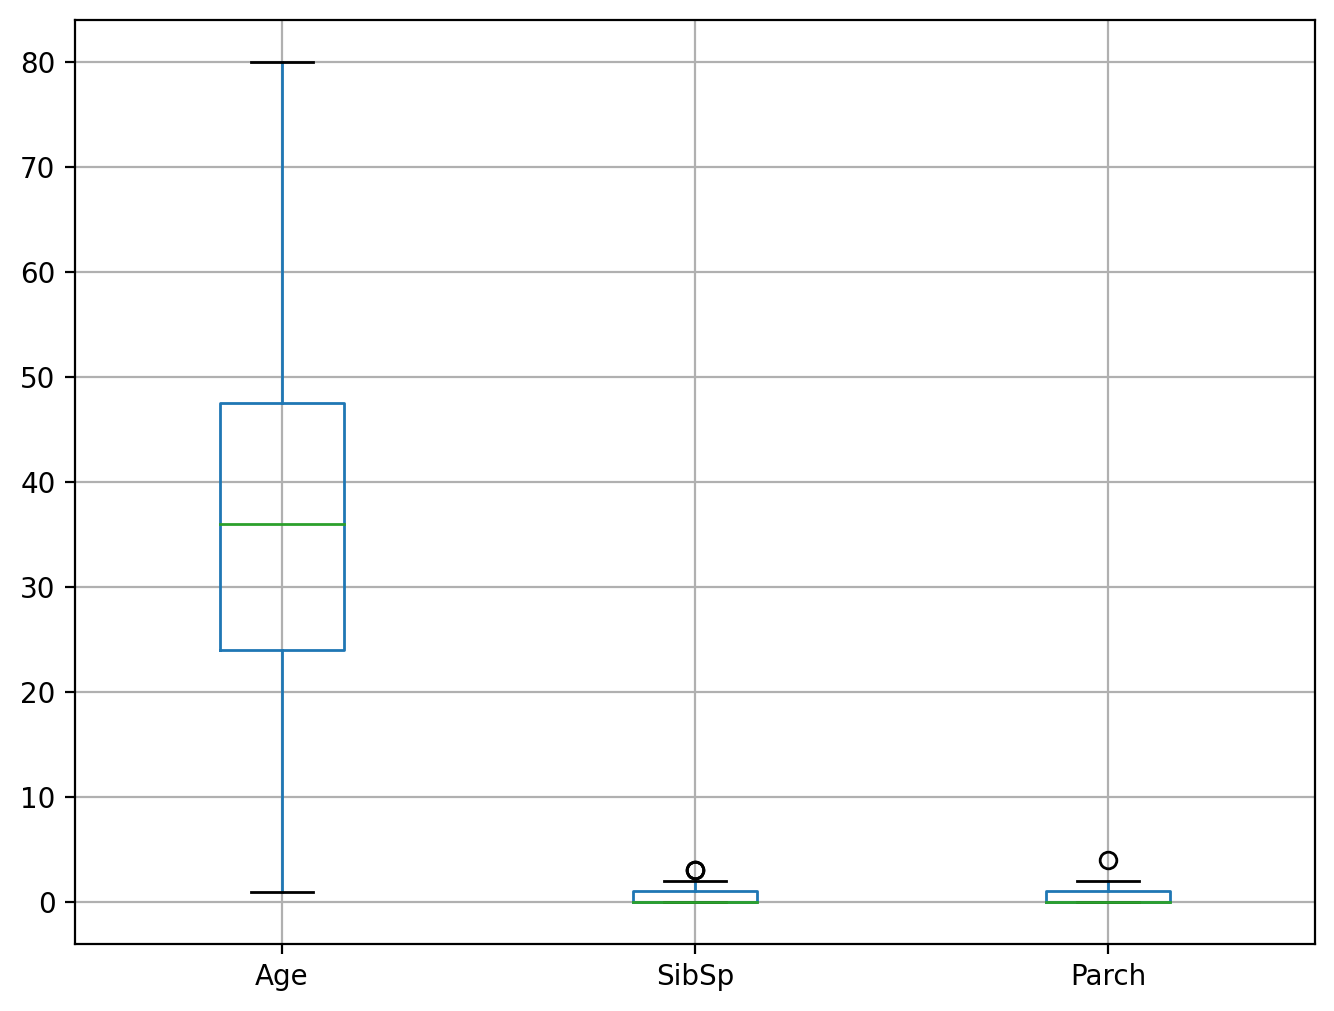

In [37]:
# 특정 컬럼만 보기
plt.figure(figsize=(8,6))
df[['Age', 'SibSp','Parch']].boxplot()

<AxesSubplot: >

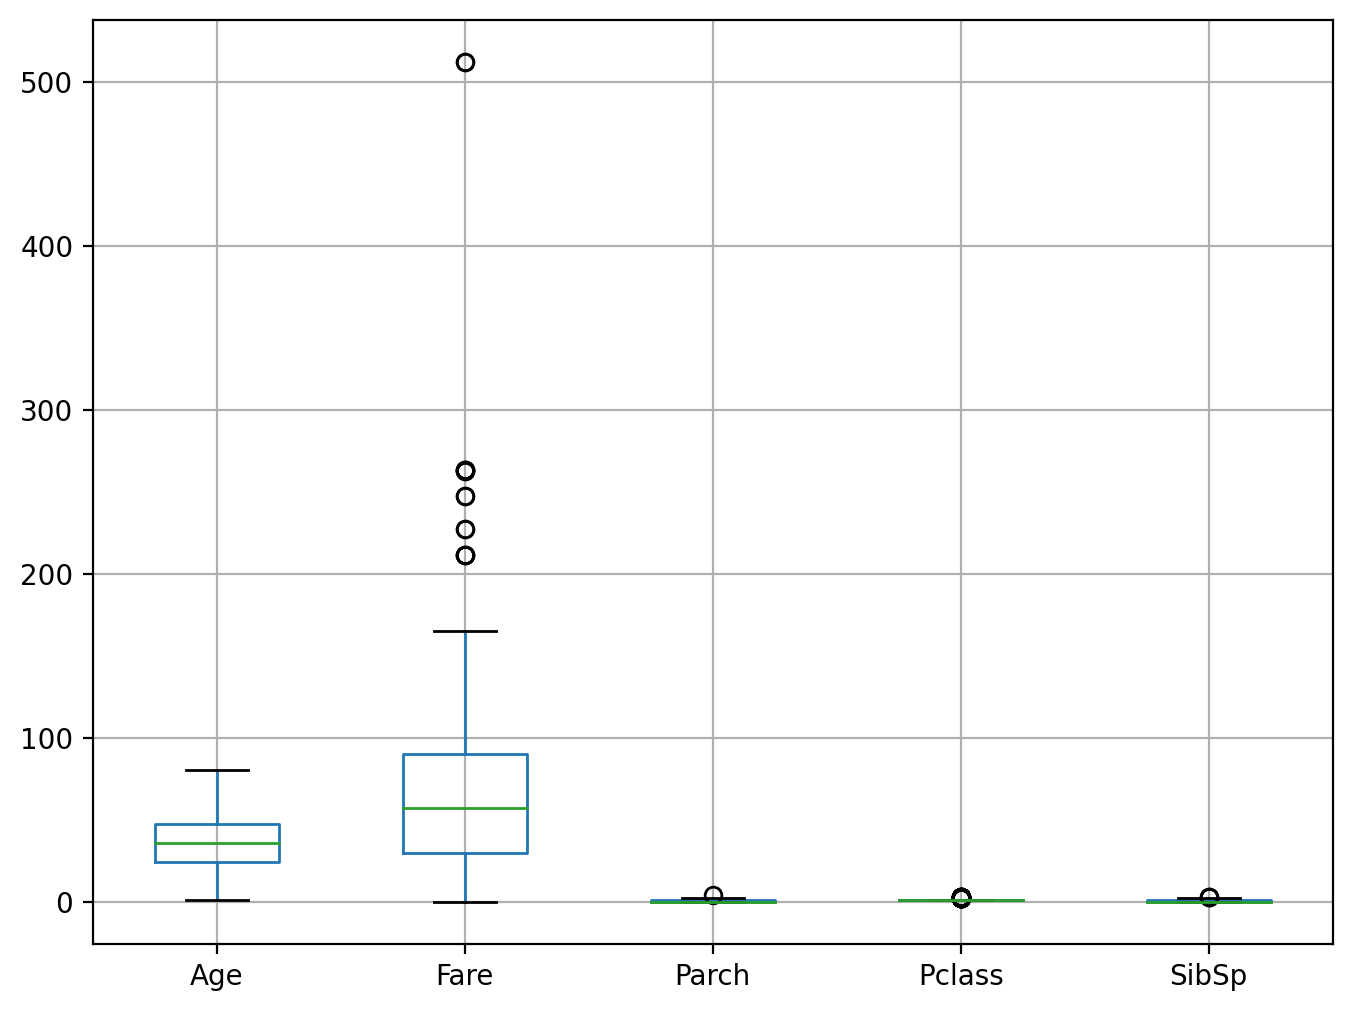

In [38]:
# 특정 컬럼만 제외하고 보기
plt.figure(figsize=(8,6))
df[df.columns.difference(['PassengerId', 'Survived'])].boxplot()

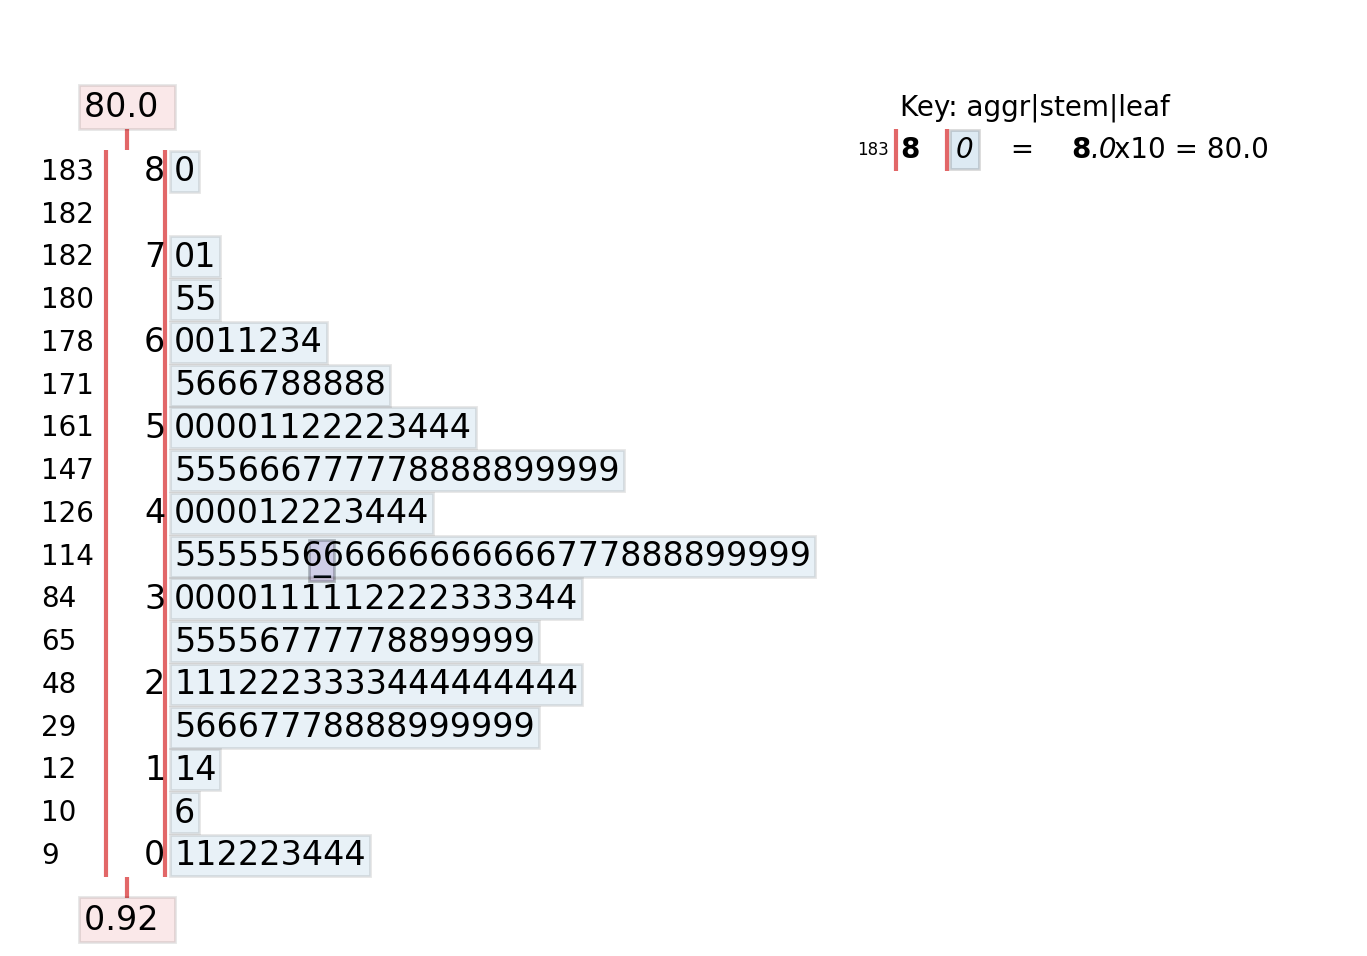

In [39]:
import stemgraphic
stemgraphic.stem_graphic(df.Age)
plt.show()


### <a id='toc1_3_2_'></a>[산포도](#toc0_)
 Age와 Fare의 상관계수는 0.093인데 이는 상관성이 거의 없다고 볼 수 있다. \
 해당 상관계수의 p-value를 보면 유의수준 0.05보다 크기 때문에 표본의 상관계수가 모상관계수 0과 차이가 없다는 귀무가설을 기각할 수 없다. \
 따라서 해당 상관계수는 통계적으로 유의하지 않다.

Text(0, 0.5, 'Y')

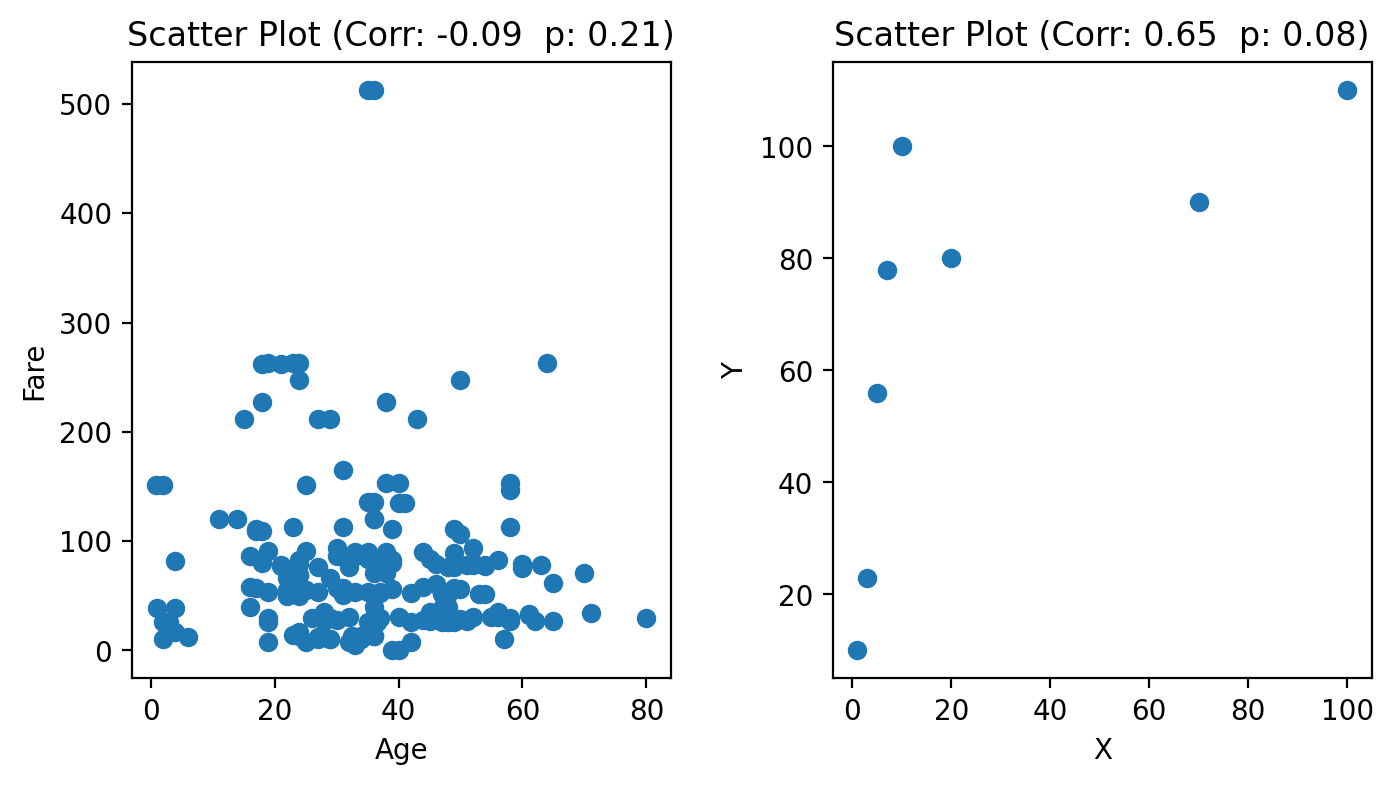

In [47]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
plt.subplots_adjust(wspace=0.3)

ax[0].scatter(df.Age, df.Fare)
ax[0].set_title('Scatter Plot (Corr: %.2f  p: %.2f)' %(stat.pearsonr(df.Age, df.Fare)))
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Fare')

xs=[1, 3, 5, 7, 10, 20, 70, 100]
ys=[10, 23, 56, 78, 100, 80, 90, 110]
ax[1].scatter(xs, ys)
ax[1].set_title('Scatter Plot (Corr: %.2f  p: %.2f)' %(stat.pearsonr(xs, ys)))
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')


### <a id='toc1_3_3_'></a>[도수 분포표와 상대도수 분포표 (구간화)](#toc0_)

In [41]:
from pandas import cut

result = cut(df.Age, bins=5)
freq1 = pd.DataFrame(result.value_counts()).reset_index()
freq1 = freq1.rename(columns={'index':'계급', 'Age':'도수'}).sort_values(by='계급')
freq1

,계급,도수
3,"(0.841, 16.736]",16
1,"(16.736, 32.552]",62
0,"(32.552, 48.368]",64
2,"(48.368, 64.184]",36
4,"(64.184, 80.0]",5


### <a id='toc1_3_4_'></a>[계산적 대표값](#toc0_)

In [42]:
from scipy.stats.mstats import gmean, hmean, tmean

print('산술평균 : {:.2f}'.format(df.Fare.mean()))

exam1 = [1.1, 1.3, 1.4, 1.5]
print('기하평균 : {:.2f}'.format(gmean(exam1)))

exam2 = [3,6]
print('조화평균 : {:.2f}'.format(hmean(exam2)))

exam3=[1,3,5,9,11,1000]
print('절사평균 : {:.2f}'.format(tmean(exam3, (1,100))))

limit_low = np.percentile(exam3, 10)
limit_high= np.percentile(exam3, 90)
print('절사평균 : {:.2f}'.format(tmean(exam3, (limit_low, limit_high))))

산술평균 : 78.68
기하평균 : 1.32
조화평균 : 4.00
절사평균 : 5.80
절사평균 : 7.00


### <a id='toc1_3_5_'></a>[위치적 대표값](#toc0_)

In [43]:
print('중위수', df.Fare.median())
print('최빈값', df.Fare.mode()[0])
print('1사분위수: ', df.Fare.quantile(q=0.25))
print('2사분위수: ', df.Fare.quantile(q=0.5))
print('3사분위수: ', df.Fare.quantile(q=0.75))
print('하위 10% 수: ', np.percentile(df.Fare, 10))

중위수 57.0
최빈값 26.55
1사분위수:  29.7
2사분위수:  57.0
3사분위수:  90.0
하위 10% 수:  13.0


### <a id='toc1_3_6_'></a>[절대적 산포도](#toc0_)

In [44]:
def IQR(data):
    return data.quantile(0.75) - data.quantile(0.25)
def MD(data):
    return np.mean(np.abs(np.array(data) - np.mean(data)))

print('범위: ', df.Fare.max() - df.Fare.min())

print('평균편차: %.2f' %(MD(df.Fare)))
print('사분편차: %.2f' %(IQR(df.Fare)/2))

print('모 분산: %.2f' %(df.Fare.var(ddof=0)))
print('표본 분산: %.2f' %(df.Fare.var(ddof=1)))

print('모 표준편차: %.2f' %(df.Fare.std(ddof=0)))
print('표본 표준편차: %.2f' %(df.Fare.std(ddof=1)))

범위:  512.3292
평균편차: 50.04
사분편차: 30.15
모 분산: 5797.14
표본 분산: 5828.99
모 표준편차: 76.14
표본 표준편차: 76.35


### <a id='toc1_3_7_'></a>[왜도와 첨도](#toc0_)
- 왜도 (Skewness)
    - 음수일 경우 오른쪽으로 치우침
    - 양수일 경우 왼쪽으로 치우침
- 첨도 (Kurtosis)
    - 3보다 크다면 뾰족하고 꼬리가늘다.
    - 3보다 작다면 뭉툭하고 꼬리두텁다.

In [51]:
from scipy.stats import skew, kurtosis

#pandas
print('왜도: %.3f  첨도: %.3f' %(df.Fare.skew(), df.Fare.kurt()))

#scipy
print('왜도: %.3f  첨도: %.3f' %(skew(df.Fare, bias=False), kurtosis(df.Fare, bias=False)))

왜도: 2.716  첨도: 10.751
왜도: 2.716  첨도: 10.751


### <a id='toc1_3_8_'></a>[상관계수](#toc0_)
Age와 Fare의 상관계수는 0.09인데 이는 상관성이 거의 없다고 볼 수 있다.<br>
해당 상관계수의 p-value를 보면 유의수준 0.05보다 크기 때문에 표본의 상관계수가 모상관계수 0과 차이가 없다는 귀무가설을 기각할 수 있다.<br>
따라서, 해당 상관계수는 통계적으로 유의하지 않다.

In [53]:
corr, p = stat.pearsonr(df.Age, df.Fare)
print('상관계수 : %.2f  p-value: %.2f' %(corr, p))

상관계수 : -0.09  p-value: 0.21


## <a id='toc1_4_'></a>[범주형 변수 탐색](#toc0_)

### <a id='toc1_4_1_'></a>[도수 분포표 및 상대도수 분포표](#toc0_)

In [45]:
def show_frequency(col):
    freq = pd.DataFrame(df[col].value_counts())
    freq['상대도수'] = freq[col].apply(lambda x: x / freq[col].sum())
    freq.rename(columns={col:'도수'}, inplace=True)
    print(freq)

col_names = ['Sex', 'Embarked']
for col in col_names:
    show_frequency(col)

        도수      상대도수
male    95  0.519126
female  88  0.480874
    도수      상대도수
S  116  0.633880
C   65  0.355191
Q    2  0.010929


### <a id='toc1_4_2_'></a>[상관계수 분석](#toc0_)

In [46]:
from scipy.stats import spearmanr, kendalltau

corr, p = spearmanr(df.Survived, df.Pclass)
print("스피어만 상관계수 : {:.3f}, p-value : {:.3f}".format(corr, p))
corr, p = kendalltau(df.Survived, df.Pclass)
print("kendalltau 상관계수 : {:.3f}, p-value : {:.3f}".format(corr, p))

스피어만 상관계수 : -0.002, p-value : 0.982
kendalltau 상관계수 : -0.002, p-value : 0.982
